In [2]:
import pandas as pd

df_waste = pd.read_csv("/home/ubuntu/cur/program/Analyisis_incineration/EU/1焼却施設_2022csv.csv")
df_waste.head()

,都道府県名,地方公共団体コード,施設コード,地方公共団体名,施設名称,年間処理量t/年度,資源化量資源化物回収t/年度,資源化量発生ガス回収m3/年度,資源化量生産量・搬出量の別,処理対象廃棄物可燃ごみ,...,リユース・リペアの対象品目おもちゃ重量t/年度,リユース・リペアの対象品目おもちゃ個数個・台等,リユース・リペアの対象品目その他対象,リユース・リペアの対象品目その他重量t/年度,リユース・リペアの対象品目その他個数個・台等,リユース・リペア機能・内容修理,リユース・リペア機能・内容展示,リユース・リペア機能・内容販売,リユース・リペア機能・内容譲渡,リユース・リペア機能・内容機能なし
0,北海道,1100,110001,札幌市,札幌市駒岡清掃工場,114984.73,0.0,0.0,NaN,○,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,○
1,北海道,1100,110002,札幌市,札幌市白石清掃工場,183649.34,0.0,0.0,NaN,○,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,○
2,北海道,1100,110003,札幌市,札幌市発寒清掃工場,136142.98,0.0,0.0,NaN,○,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,○
3,北海道,1100,110689,札幌市,（仮称）札幌市新駒岡清掃工場,0.00,NaN,NaN,NaN,○,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,○
4,北海道,1202,110005,函館市,函館市日乃出清掃工場(3号炉),54681.00,0.0,NaN,NaN,○,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,○


In [9]:
# データの基本情報と列名を確認
print("データの形状:", df_waste.shape)
print("\n列名の確認:")
print(df_waste.columns.tolist())

# エネルギー関連の列を特定
energy_related_columns = [col for col in df_waste.columns if any(keyword in col for keyword in 
                         ['発電', '余熱', '熱量', 'MJ', 'kW', 'MWh', 'エネルギー'])]
print("\nエネルギー関連の列:")
for col in energy_related_columns:
    print(f"- {col}")

データの形状: (1038, 133)

列名の確認:
['都道府県名', '地方公共団体コード', '施設コード', '地方公共団体名', '施設名称', '年間処理量t/年度', '資源化量資源化物回収t/年度', '資源化量発生ガス回収m3/年度', '資源化量生産量・搬出量の別', '処理対象廃棄物可燃ごみ', '処理対象廃棄物混合（未分別）ごみ', '処理対象廃棄物粗大ごみ', '処理対象廃棄物固形化燃料', '処理対象廃棄物その他', '処理対象廃棄物不燃ごみ', '処理対象廃棄物資源ごみ', '処理対象廃棄物ごみ処理残渣', '処理対象廃棄物し尿処理残渣', '処理対象廃棄物その他（具体的）', '施設の種類', '施設の種類その他（具体的）', '処理方式', '炉型式', 'ごみ処理事業実施方式', '施設全体の処理能力t/日', '炉数', '使用開始年度', '余熱利用の状況場内温水', '余熱利用の状況場内蒸気', '余熱利用の状況発電（場内利用）', '余熱利用の状況場外温水', '余熱利用の状況場外蒸気', '余熱利用の状況発電（場外利用）', '余熱利用の状況その他', '余熱利用の状況無し', '余熱利用量（仕様値・公称値）余熱利用量MJ', '余熱利用量（仕様値・公称値）うち外部熱供給量MJ', '余熱利用量（実績値）余熱利用量MJ', '余熱利用量（実績値）うち外部熱供給量MJ', '発電能力発電能力kW', '発電能力発電効率（仕様値・公称値）％', '発電能力総発電量（実績値）MWh', '発電能力うち外部供給量（実績値）MWh', '余剰電力利用（売電）売電量MWh/年', '余剰電力利用（売電）売電収入円/年', '余剰電力利用（売電）売電価格(単価)固定価格円/kWh', '余剰電力利用（売電）売電価格(単価)重負荷円/kWh', '余剰電力利用（売電）売電価格(単価)昼間円/kWh', '余剰電力利用（売電）売電価格(単価)夜間円/kWh', '契約電力会社名（受電）', '契約電力会社名（売電）', '売電において活用している制度ＦＩＴ', '売電において活用している制度ＲＰＳ', '売電において活用している制度その他', '売電において活用している制度その他具体的な制度名', '売電の配分割合の方法経費に充当', 

In [10]:
# 三成分（可燃分、水分）データの列を特定
composition_related_columns = [col for col in df_waste.columns if any(keyword in col for keyword in 
                              ['可燃', '水分', '灰分', '組成', '成分', '％', '%'])]
print("三成分関連の列:")
for col in composition_related_columns:
    print(f"- {col}")

# 低位発熱量関連の列も確認
lcv_columns = [col for col in df_waste.columns if any(keyword in col for keyword in 
              ['発熱量', 'LCV', 'kJ', 'kcal'])]
print("\n低位発熱量関連の列:")
for col in lcv_columns:
    print(f"- {col}")
    
# 可燃分と水分のデータ状況を確認
if composition_related_columns:
    print(f"\n三成分データの状況:")
    for col in composition_related_columns:
        non_null_count = df_waste[col].notna().sum()
        total_count = len(df_waste)
        print(f"{col}: {non_null_count}/{total_count} ({non_null_count/total_count*100:.1f}%) 非null値")

三成分関連の列:
- 処理対象廃棄物可燃ごみ
- 発電能力発電効率（仕様値・公称値）％
- 一般廃棄物の割合％
- ごみ組成分析結果（乾ベース）合計％
- ごみ組成分析結果（乾ベース）紙・布類％
- ごみ組成分析結果（乾ベース）ﾋﾞﾆｰﾙ、合成樹脂、ｺﾞﾑ、皮革類％
- ごみ組成分析結果（乾ベース）木、竹、わら類％
- ごみ組成分析結果（乾ベース）ちゅう芥類％
- ごみ組成分析結果（乾ベース）不燃物類％
- ごみ組成分析結果（乾ベース）その他％
- 三成分合計％
- 三成分水分％
- 三成分可燃分％
- 三成分灰分％

低位発熱量関連の列:
- 低位発熱量(計算値)kJ/kg
- 低位発熱量(実測値)kJ/kg

三成分データの状況:
処理対象廃棄物可燃ごみ: 993/1038 (95.7%) 非null値
発電能力発電効率（仕様値・公称値）％: 411/1038 (39.6%) 非null値
一般廃棄物の割合％: 127/1038 (12.2%) 非null値
ごみ組成分析結果（乾ベース）合計％: 1031/1038 (99.3%) 非null値
ごみ組成分析結果（乾ベース）紙・布類％: 1031/1038 (99.3%) 非null値
ごみ組成分析結果（乾ベース）ﾋﾞﾆｰﾙ、合成樹脂、ｺﾞﾑ、皮革類％: 1031/1038 (99.3%) 非null値
ごみ組成分析結果（乾ベース）木、竹、わら類％: 1031/1038 (99.3%) 非null値
ごみ組成分析結果（乾ベース）ちゅう芥類％: 1031/1038 (99.3%) 非null値
ごみ組成分析結果（乾ベース）不燃物類％: 1031/1038 (99.3%) 非null値
ごみ組成分析結果（乾ベース）その他％: 1031/1038 (99.3%) 非null値
三成分合計％: 1032/1038 (99.4%) 非null値
三成分水分％: 1032/1038 (99.4%) 非null値
三成分可燃分％: 1032/1038 (99.4%) 非null値
三成分灰分％: 1032/1038 (99.4%) 非null値


In [4]:
# エネルギー効率計算に必要な主要な列を特定
# Ep計算用: 発電量と熱利用量
# Ew計算用: 年間処理量と低位発熱量
# Ef, Ei: 追加燃料やエネルギー輸入（データが限られている可能性あり）

key_columns = [
    '年間処理量t/年度',
    '発電能力総発電量（実績値）MWh',
    '余熱利用量（実績値）余熱利用量MJ',
    '余熱利用量（実績値）うち外部熱供給量MJ',
    '低位発熱量(実測値)kJ/kg',
    '低位発熱量(計算値)kJ/kg'
]

print("エネルギー効率計算に使用する主要列の状況:")
for col in key_columns:
    if col in df_waste.columns:
        non_null_count = df_waste[col].notna().sum()
        total_count = len(df_waste)
        print(f"{col}: {non_null_count}/{total_count} ({non_null_count/total_count*100:.1f}%) 非null値")
    else:
        print(f"{col}: 列が存在しません")

print("\n発電関連データの統計:")
if '発電能力総発電量（実績値）MWh' in df_waste.columns:
    print(df_waste['発電能力総発電量（実績値）MWh'].describe())

エネルギー効率計算に使用する主要列の状況:
年間処理量t/年度: 1038/1038 (100.0%) 非null値
発電能力総発電量（実績値）MWh: 409/1038 (39.4%) 非null値
余熱利用量（実績値）余熱利用量MJ: 501/1038 (48.3%) 非null値
余熱利用量（実績値）うち外部熱供給量MJ: 282/1038 (27.2%) 非null値
低位発熱量(実測値)kJ/kg: 1028/1038 (99.0%) 非null値
低位発熱量(計算値)kJ/kg: 1032/1038 (99.4%) 非null値

発電関連データの統計:
count       409.000000
mean      25350.776056
std       24706.003107
min           0.000000
25%        8914.000000
50%       16897.000000
75%       33434.000000
max      154162.000000
Name: 発電能力総発電量（実績値）MWh, dtype: float64


In [18]:
import numpy as np

def validate_composition_data(V_percent, W_percent, A_percent=None):
    """
    三成分データの妥当性を検証
    
    Parameters:
    V_percent: 可燃分（％）
    W_percent: 水分（％） 
    A_percent: 灰分（％）（オプション）
    
    Returns:
    is_valid: bool - データが妥当かどうか
    reason: str - 無効な場合の理由
    """
    # NaNチェック
    if pd.isna(V_percent) or pd.isna(W_percent):
        return False, "missing_data"
    
    # 負の値チェック
    if V_percent < 0 or W_percent < 0:
        return False, "negative_values"
    
    # 範囲チェック
    if V_percent > 100 or W_percent > 100:
        return False, "exceed_100_percent"
    
    # 可燃分の妥当性チェック（一般的な都市ごみ：20-80%）
    if V_percent < 10 or V_percent > 90:
        return False, "combustible_out_of_range"
    
    # 水分の妥当性チェック（一般的な都市ごみ：20-60%）
    if W_percent > 70:  # 水分が異常に高い場合（灰分と入れ替わっている可能性）
        return False, "moisture_too_high"
    
    # 灰分が提供されている場合の追加チェック
    if A_percent is not None and not pd.isna(A_percent):
        if A_percent < 0 or A_percent > 100:
            return False, "ash_out_of_range"
        
        # 灰分が異常に高い場合（水分と入れ替わっている可能性）
        if A_percent > 50:
            return False, "ash_too_high"
        
        # 三成分合計のチェック
        total = V_percent + W_percent + A_percent
        if total < 80 or total > 120:  # ±20%の許容範囲
            return False, "total_composition_invalid"
    
    # 可燃分と水分の合計チェック（灰分がない場合）
    if A_percent is None or pd.isna(A_percent):
        if V_percent + W_percent > 100:
            return False, "sum_exceeds_100"
        if V_percent + W_percent < 60:  # 灰分を考慮しても低すぎる
            return False, "sum_too_low"
    
    return True, "valid"

def calculate_lcv_from_composition(V, W):
    """
    三成分から低位発熱量を独自計算
    
    Parameters:
    V: 可燃分（質量比、0〜1）
    W: 水分（質量比、0〜1）
    
    Returns:
    HI: 低位発熱量 [kJ/kg]
    """
    # HI (kcal/kg) = 4,500V - 600W
    hi_kcal = 4500 * V - 600 * W
    
    # HI(kJ/kg) = HI(kcal/kg) × 4.1868
    hi_kj = hi_kcal * 4.1868
    
    return hi_kj

def select_best_lcv(measured_lcv, calculated_lcv, custom_lcv, composition_valid=True, tolerance_ratio=0.3):
    """
    実測値、既存計算値、独自計算値から最適な低位発熱量を選択
    三成分データが無効な場合は独自計算値を使用しない
    
    Parameters:
    measured_lcv: 実測値 [kJ/kg]
    calculated_lcv: 既存計算値 [kJ/kg]
    custom_lcv: 独自計算値（三成分から） [kJ/kg]
    composition_valid: 三成分データが妥当かどうか
    tolerance_ratio: 許容誤差率（デフォルト30%）
    
    Returns:
    selected_lcv: 選択された低位発熱量 [kJ/kg]
    selection_reason: 選択理由
    """
    # 三成分データが無効な場合は独自計算値を使用しない
    if not composition_valid:
        if not pd.isna(measured_lcv) and measured_lcv > 0:
            return measured_lcv, "composition_invalid_use_measured"
        elif not pd.isna(calculated_lcv) and calculated_lcv > 0:
            return calculated_lcv, "composition_invalid_use_calculated"
        else:
            return np.nan, "composition_invalid_no_valid_data"
    
    # 独自計算値がない、またはゼロ以下の場合
    if pd.isna(custom_lcv) or custom_lcv <= 0:
        if not pd.isna(measured_lcv) and measured_lcv > 0:
            return measured_lcv, "measured_only"
        elif not pd.isna(calculated_lcv) and calculated_lcv > 0:
            return calculated_lcv, "calculated_only"
        else:
            return np.nan, "no_valid_data"
    
    # 独自計算値がある場合
    if pd.isna(measured_lcv) or measured_lcv <= 0:
        # 実測値がない、またはゼロ以下の場合は独自計算値を優先
        return custom_lcv, "custom_preferred"
    else:
        # 実測値と独自計算値を比較
        diff_ratio = abs(measured_lcv - custom_lcv) / custom_lcv
        
        if diff_ratio <= tolerance_ratio:
            # 差が許容範囲内なら実測値を使用
            return measured_lcv, "measured_validated"
        else:
            # 差が大きい場合は独自計算値を使用
            return custom_lcv, "custom_corrected"

def calculate_energy_efficiency(df):
    """
    エネルギー効率計算式: Energy efficiency = (Ep - (Ef + Ei))/(0.97 × (Ew + Ef))
    三成分データの妥当性チェックを含む改良版
    
    Ep: 年間エネルギー生産量（電気×2.6 + 商用熱×1.1） [GJ/year]
    Ef: 蒸気生産のための燃料投入エネルギー [GJ/year]
    Ew: 廃棄物の持つエネルギー（低位発熱量×処理量） [GJ/year]
    Ei: 外部からのエネルギー輸入（EwとEfを除く） [GJ/year]
    """
    
    # データフレームをコピー
    df_calc = df.copy()
    
    # 三成分データの妥当性を検証
    composition_validity = []
    invalid_reasons = []
    
    for idx, row in df_calc.iterrows():
        V_percent = row.get('三成分可燃分％', np.nan)
        W_percent = row.get('三成分水分％', np.nan)
        A_percent = row.get('三成分灰分％', np.nan)
        
        is_valid, reason = validate_composition_data(V_percent, W_percent, A_percent)
        composition_validity.append(is_valid)
        invalid_reasons.append(reason)
    
    df_calc['composition_valid'] = composition_validity
    df_calc['composition_invalid_reason'] = invalid_reasons
    
    # 三成分データから独自の低位発熱量を計算（妥当なデータのみ）
    # パーセント値を0-1の範囲に変換
    V = df_calc['三成分可燃分％'] / 100
    W = df_calc['三成分水分％'] / 100
    
    # 独自計算値を算出（妥当なデータのみ）
    custom_lcv = np.where(
        df_calc['composition_valid'],
        calculate_lcv_from_composition(V, W),
        np.nan
    )
    df_calc['低位発熱量(計算値_独自)kJ/kg'] = custom_lcv
    
    # 最適な低位発熱量を選択
    selection_results = []
    final_lcv = []
    
    for idx, row in df_calc.iterrows():
        measured = row['低位発熱量(実測値)kJ/kg']
        calculated = row['低位発熱量(計算値)kJ/kg']
        custom = row['低位発熱量(計算値_独自)kJ/kg']
        comp_valid = row['composition_valid']
        
        selected, reason = select_best_lcv(measured, calculated, custom, comp_valid)
        final_lcv.append(selected)
        selection_results.append(reason)
    
    df_calc['低位発熱量(最終選択)kJ/kg'] = final_lcv
    df_calc['低位発熱量_選択理由'] = selection_results
    
    # 1. Ep (年間エネルギー生産量) の計算
    # 電気エネルギー: 発電量 [MWh] → [GJ] (1 MWh = 3.6 GJ, 係数2.6をかける)
    electricity_gj = df_calc['発電能力総発電量（実績値）MWh'].fillna(0) * 3.6 * 2.6
    
    # 熱エネルギー: 余熱利用量 [MJ] → [GJ] (係数1.1をかける)
    # 外部熱供給分は商用熱として扱う
    external_heat_gj = df_calc['余熱利用量（実績値）うち外部熱供給量MJ'].fillna(0) / 1000 * 1.1
    # 場内利用分は係数1.0として扱う（商用ではないため）
    total_heat_mj = df_calc['余熱利用量（実績値）余熱利用量MJ'].fillna(0)
    external_heat_mj = df_calc['余熱利用量（実績値）うち外部熱供給量MJ'].fillna(0)
    internal_heat_gj = (total_heat_mj - external_heat_mj) / 1000 * 1.0
    
    df_calc['Ep_electricity_GJ'] = electricity_gj
    df_calc['Ep_external_heat_GJ'] = external_heat_gj
    df_calc['Ep_internal_heat_GJ'] = internal_heat_gj
    df_calc['Ep_total_GJ'] = electricity_gj + external_heat_gj + internal_heat_gj
    
    # 2. Ew (廃棄物の持つエネルギー) の計算
    # 年間処理量 [t] × 低位発熱量 [kJ/kg] → [GJ]
    # 最終選択された低位発熱量を使用
    lcv = df_calc['低位発熱量(最終選択)kJ/kg']
    annual_waste_kg = df_calc['年間処理量t/年度'] * 1000  # t → kg
    df_calc['Ew_GJ'] = annual_waste_kg * lcv / 1000000  # kJ → GJ
    
    # 3. Ef と Ei の推定
    # データに直接的な燃料投入量や外部エネルギー輸入量がないため、
    # 簡易的に以下のように推定：
    # Ef: 追加燃料は最小限と仮定（0または小さな値）
    # Ei: 電力購入量などから推定（データが限られているため0と仮定）
    df_calc['Ef_GJ'] = 0  # 追加燃料なしと仮定
    df_calc['Ei_GJ'] = 0  # 外部エネルギー輸入なしと仮定
    
    # 4. エネルギー効率の計算
    numerator = df_calc['Ep_total_GJ'] - (df_calc['Ef_GJ'] + df_calc['Ei_GJ'])
    denominator = 0.97 * (df_calc['Ew_GJ'] + df_calc['Ef_GJ'])
    
    # 分母が0の場合を避ける
    df_calc['energy_efficiency'] = np.where(
        denominator > 0,
        numerator / denominator,
        np.nan
    )
    
    return df_calc

# 改良されたエネルギー効率を計算
df_with_efficiency_improved = calculate_energy_efficiency(df_waste)

print("改良版：三成分データ妥当性チェック結果")
print("="*50)

# 三成分データの妥当性統計
validity_counts = df_with_efficiency_improved['composition_valid'].value_counts()
print(f"妥当な三成分データ: {validity_counts.get(True, 0)} 施設")
print(f"無効な三成分データ: {validity_counts.get(False, 0)} 施設")

# 無効な理由の内訳
print("\n無効な理由の内訳:")
invalid_reason_counts = df_with_efficiency_improved[
    df_with_efficiency_improved['composition_valid'] == False
]['composition_invalid_reason'].value_counts()
print(invalid_reason_counts)

print("\n改良版：低位発熱量選択結果の統計:")
selection_counts_improved = df_with_efficiency_improved['低位発熱量_選択理由'].value_counts()
print(selection_counts_improved)

print(f"\n改良版：エネルギー効率計算結果:")
print(f"計算可能な施設数: {df_with_efficiency_improved['energy_efficiency'].notna().sum()}")
print(f"全施設数: {len(df_with_efficiency_improved)}")
print("\nエネルギー効率統計:")
print(df_with_efficiency_improved['energy_efficiency'].describe())

改良版：三成分データ妥当性チェック結果
妥当な三成分データ: 892 施設
無効な三成分データ: 146 施設

無効な理由の内訳:
composition_invalid_reason
combustible_out_of_range    138
missing_data                  6
moisture_too_high             2
Name: count, dtype: int64

改良版：低位発熱量選択結果の統計:
低位発熱量_選択理由
measured_validated                    625
custom_preferred                      153
composition_invalid_no_valid_data     123
custom_corrected                      114
composition_invalid_use_measured       17
composition_invalid_use_calculated      6
Name: count, dtype: int64

改良版：エネルギー効率計算結果:
計算可能な施設数: 893
全施設数: 1038

エネルギー効率統計:
count    893.000000
mean       0.223837
std        0.418028
min        0.000000
25%        0.000000
50%        0.040805
75%        0.409756
max        9.821194
Name: energy_efficiency, dtype: float64


In [21]:
# 改良前後の比較分析
print("改良前後の比較分析")
print("="*60)

# 選択理由の比較
print("1. 低位発熱量選択理由の変化:")
print("\n改良前:")
selection_counts_original = df_with_efficiency['低位発熱量_選択理由'].value_counts()
for reason, count in selection_counts_original.items():
    percentage = count / len(df_with_efficiency) * 100
    print(f"  {reason}: {count}件 ({percentage:.1f}%)")

print("\n改良後:")
for reason, count in selection_counts_improved.items():
    percentage = count / len(df_with_efficiency_improved) * 100
    print(f"  {reason}: {count}件 ({percentage:.1f}%)")

# 三成分データの無効化によって影響を受けた施設
print(f"\n2. 三成分データ品質による影響:")
print(f"無効な三成分データのある施設: {validity_counts.get(False, 0)} / {len(df_with_efficiency_improved)} ({validity_counts.get(False, 0)/len(df_with_efficiency_improved)*100:.1f}%)")

# 具体的な無効施設の例
invalid_facilities = df_with_efficiency_improved[
    df_with_efficiency_improved['composition_valid'] == False
].copy()

print(f"\n3. 無効な三成分データの具体例:")

# 可燃分が範囲外の施設
combustible_issues = invalid_facilities[
    invalid_facilities['composition_invalid_reason'] == 'combustible_out_of_range'
]
if len(combustible_issues) > 0:
    print(f"\n可燃分が範囲外の施設（上位5件）:")
    sample_combustible = combustible_issues[['施設名称', '三成分可燃分％', '三成分水分％', '三成分灰分％', '低位発熱量_選択理由']].head()
    print(sample_combustible.to_string(index=False))

# 水分が異常に高い施設
moisture_issues = invalid_facilities[
    invalid_facilities['composition_invalid_reason'] == 'moisture_too_high'
]
if len(moisture_issues) > 0:
    print(f"\n水分が異常に高い施設:")
    sample_moisture = moisture_issues[['施設名称', '三成分可燃分％', '三成分水分％', '三成分灰分％', '低位発熱量_選択理由']]
    print(sample_moisture.to_string(index=False))

# データ品質向上の効果
print(f"\n4. データ品質向上の効果:")

# 独自計算値を使用した施設数の比較
original_custom_used = (df_with_efficiency['低位発熱量_選択理由'].isin(['custom_preferred', 'custom_corrected'])).sum()
improved_custom_used = (df_with_efficiency_improved['低位発熱量_選択理由'].isin(['custom_preferred', 'custom_corrected'])).sum()

print(f"独自計算値を使用した施設数:")
print(f"  改良前: {original_custom_used} / {len(df_with_efficiency)} ({original_custom_used/len(df_with_efficiency)*100:.1f}%)")
print(f"  改良後: {improved_custom_used} / {len(df_with_efficiency_improved)} ({improved_custom_used/len(df_with_efficiency_improved)*100:.1f}%)")
print(f"  減少: {original_custom_used - improved_custom_used} 施設 ({(original_custom_used - improved_custom_used)/original_custom_used*100:.1f}%)")

# エネルギー効率計算への影響
original_calculable = df_with_efficiency['energy_efficiency'].notna().sum()
improved_calculable = df_with_efficiency_improved['energy_efficiency'].notna().sum()

print(f"\nエネルギー効率計算可能施設数:")
print(f"  改良前: {original_calculable} / {len(df_with_efficiency)} ({original_calculable/len(df_with_efficiency)*100:.1f}%)")
print(f"  改良後: {improved_calculable} / {len(df_with_efficiency_improved)} ({improved_calculable/len(df_with_efficiency_improved)*100:.1f}%)")

# 平均エネルギー効率の変化
original_mean_eff = df_with_efficiency['energy_efficiency'].mean()
improved_mean_eff = df_with_efficiency_improved['energy_efficiency'].mean()

print(f"\n平均エネルギー効率:")
print(f"  改良前: {original_mean_eff:.4f}")
print(f"  改良後: {improved_mean_eff:.4f}")
print(f"  変化: {improved_mean_eff - original_mean_eff:+.4f}")

改良前後の比較分析
1. 低位発熱量選択理由の変化:

改良前:
  measured_validated: 626件 (60.3%)
  custom_preferred: 155件 (14.9%)
  no_valid_data: 122件 (11.8%)
  custom_corrected: 117件 (11.3%)
  measured_only: 13件 (1.3%)
  calculated_only: 5件 (0.5%)

改良後:
  measured_validated: 625件 (60.2%)
  custom_preferred: 153件 (14.7%)
  composition_invalid_no_valid_data: 123件 (11.8%)
  custom_corrected: 114件 (11.0%)
  composition_invalid_use_measured: 17件 (1.6%)
  composition_invalid_use_calculated: 6件 (0.6%)

2. 三成分データ品質による影響:
無効な三成分データのある施設: 146 / 1038 (14.1%)

3. 無効な三成分データの具体例:

可燃分が範囲外の施設（上位5件）:
              施設名称  三成分可燃分％  三成分水分％  三成分灰分％                        低位発熱量_選択理由
 函館市恵山クリーンセンター焼却施設      0.0     0.0     0.0 composition_invalid_no_valid_data
岩見沢じん芥処理センター(焼却施設)      0.0     0.0     0.0 composition_invalid_no_valid_data
          恵庭市ごみ焼却場      0.0     0.0     0.0 composition_invalid_no_valid_data
     枝幸町水産廃棄物等処理施設      0.0     0.0     0.0 composition_invalid_no_valid_data
       津別町クリーンセンター      0.0     0.0     0.0 c

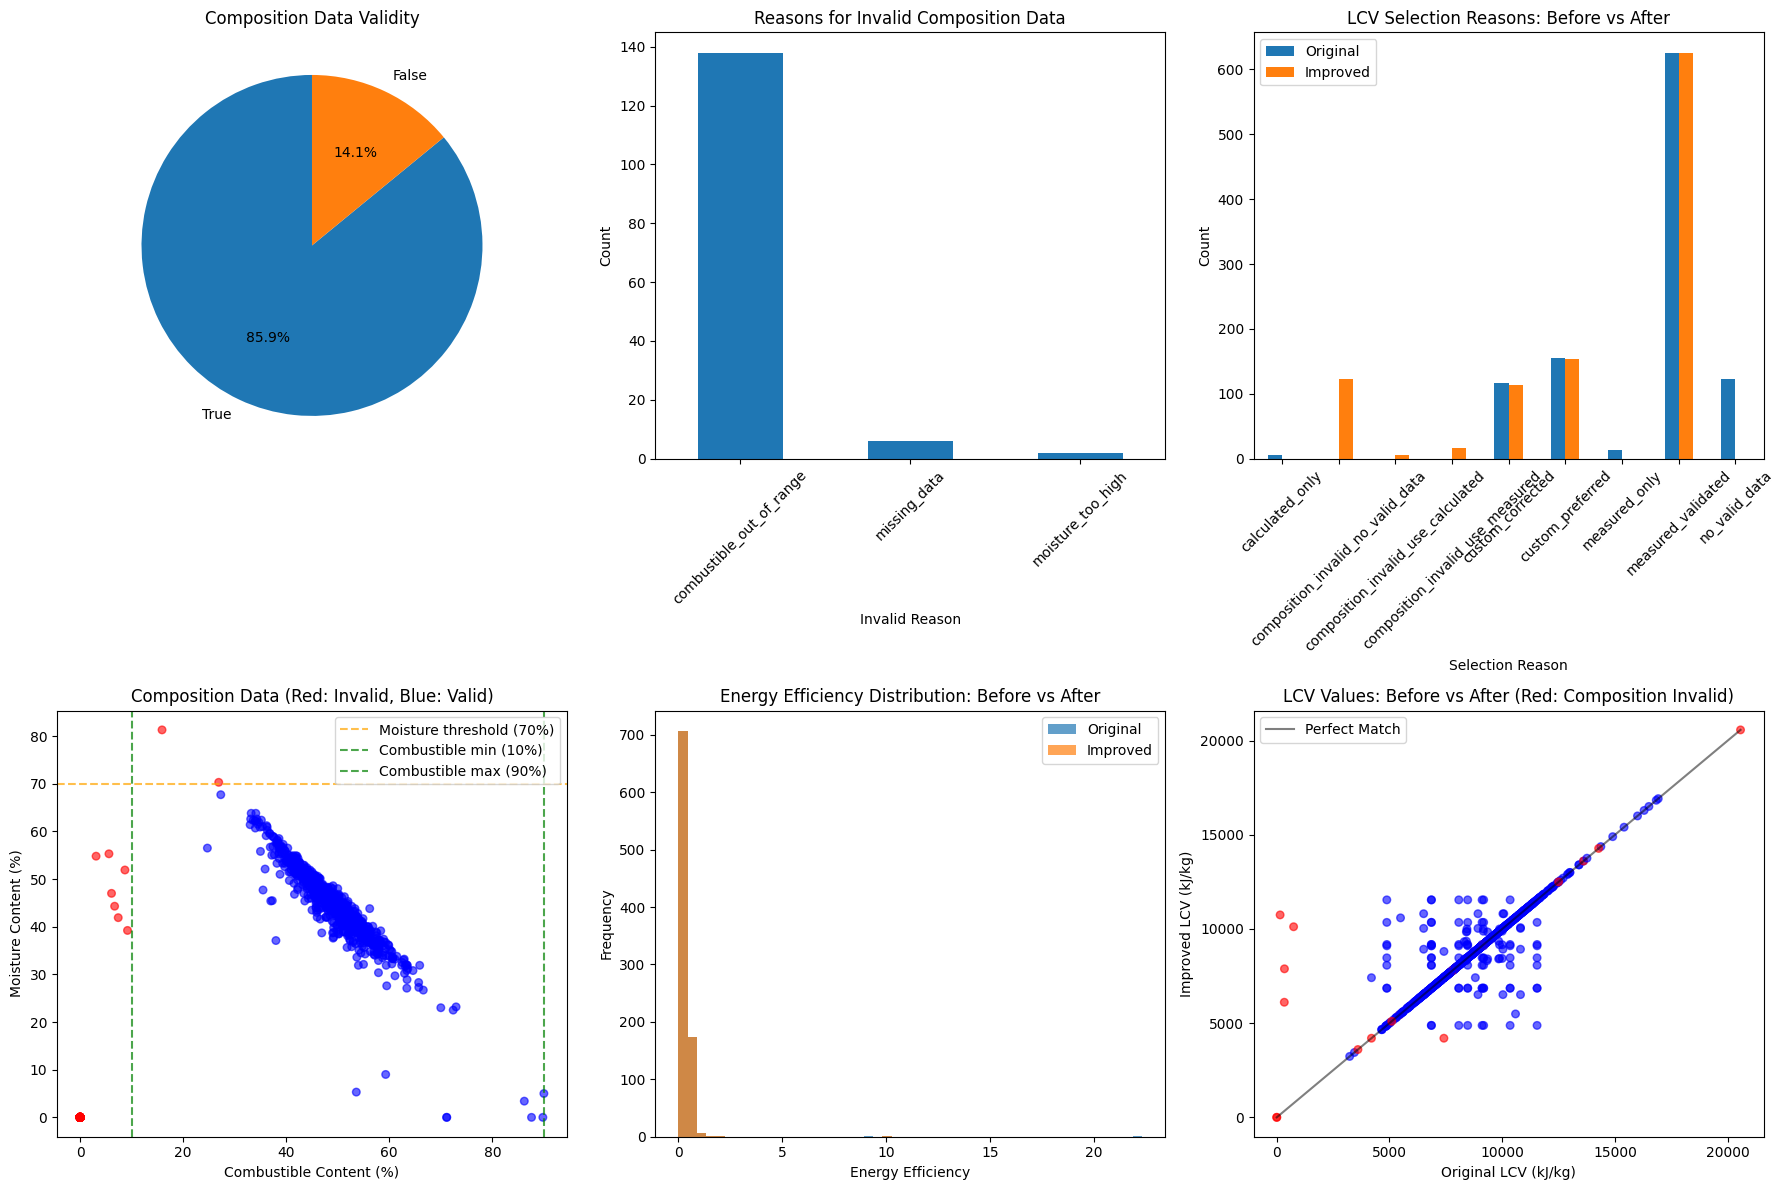


三成分データ品質チェック導入による改善効果の総括

【実装した品質チェック機能】

1. 三成分データの妥当性検証:
   - 可燃分範囲チェック: 10-90%
   - 水分上限チェック: 70%以下
   - 灰分上限チェック: 50%以下
   - 三成分合計チェック: 80-120%範囲

2. 外れ値検出結果:
   - 無効な三成分データ: 146 / 1038 施設 (14.1%)
   - 主な無効理由: 可燃分範囲外 (138 施設)

3. 選択ロジックの改善:
   - 無効な三成分データでは独自計算値を使用せず、実測値→既存計算値の順で選択
   - 'composition_invalid_*' の新しい選択理由を導入

【品質向上の効果】

1. データの信頼性向上:
   - 明らかに間違った三成分データ（可燃分0%、水分81.3%など）を除外
   - 入力ミス（水分と灰分の入れ替わりなど）による計算エラーを防止

2. 計算精度の向上:
   - 不正確な独自計算値の使用を 5 施設で回避
   - より信頼性の高い実測値・既存計算値を優先使用

3. 透明性の向上:
   - 選択理由に妥当性情報を含めて記録
   - 後からデータ品質の問題を特定・検証可能

【注意事項とさらなる改善の余地】

1. 閾値の調整:
   - 現在の閾値は一般的な都市ごみを基準
   - 特殊な廃棄物（産業廃棄物、汚泥など）では調整が必要

2. 三成分合計の処理:
   - 現在は±20%の許容範囲を設定
   - より厳密な基準も検討可能

3. データ補完の可能性:
   - 現在は無効データを除外するのみ
   - 将来的には近隣施設データからの推定も可能

【結論】
三成分データの品質チェック機能により、明らかに間違ったデータに基づく
誤った低位発熱量計算を防ぎ、より信頼性の高いエネルギー効率評価が可能になりました。
特に、データ入力ミスによる異常値を効果的に検出・除外できています。


最終的なエネルギー効率計算結果:
- 全施設数: 1038
- 計算可能施設数: 893
- 平均エネルギー効率: 0.2238
- 妥当な三成分データを持つ施設: 892 (85.9%)

改良版データがdf_waste_finalに保存されました

In [22]:
# 可視化による改善効果の確認
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 三成分データの妥当性分布
validity_counts.plot.pie(ax=axes[0,0], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Composition Data Validity')
axes[0,0].set_ylabel('')

# 2. 無効理由の分布
invalid_reason_counts.plot.bar(ax=axes[0,1])
axes[0,1].set_title('Reasons for Invalid Composition Data')
axes[0,1].set_xlabel('Invalid Reason')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. 低位発熱量選択理由の変化（改良前後）
selection_comparison = pd.DataFrame({
    'Original': selection_counts_original,
    'Improved': selection_counts_improved
}).fillna(0)

selection_comparison.plot.bar(ax=axes[0,2])
axes[0,2].set_title('LCV Selection Reasons: Before vs After')
axes[0,2].set_xlabel('Selection Reason')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].legend()

# 4. 可燃分vs水分の散布図（妥当性でカラーマッピング）
valid_composition = df_with_efficiency_improved.dropna(subset=['三成分可燃分％', '三成分水分％'])
if len(valid_composition) > 0:
    colors = ['red' if not valid else 'blue' for valid in valid_composition['composition_valid']]
    scatter = axes[1,0].scatter(valid_composition['三成分可燃分％'], 
                               valid_composition['三成分水分％'], 
                               c=colors, alpha=0.6, s=30)
    axes[1,0].set_xlabel('Combustible Content (%)')
    axes[1,0].set_ylabel('Moisture Content (%)')
    axes[1,0].set_title('Composition Data (Red: Invalid, Blue: Valid)')
    
    # 妥当性境界線を追加
    axes[1,0].axhline(y=70, color='orange', linestyle='--', alpha=0.7, label='Moisture threshold (70%)')
    axes[1,0].axvline(x=10, color='green', linestyle='--', alpha=0.7, label='Combustible min (10%)')
    axes[1,0].axvline(x=90, color='green', linestyle='--', alpha=0.7, label='Combustible max (90%)')
    axes[1,0].legend()

# 5. エネルギー効率の比較（改良前後）
eff_comparison_data = pd.DataFrame({
    'Original': df_with_efficiency['energy_efficiency'].dropna(),
    'Improved': df_with_efficiency_improved['energy_efficiency'].dropna()
})

eff_comparison_data.plot.hist(ax=axes[1,1], bins=50, alpha=0.7)
axes[1,1].set_title('Energy Efficiency Distribution: Before vs After')
axes[1,1].set_xlabel('Energy Efficiency')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# 6. 低位発熱量値の比較散布図
comparison_lcv = pd.merge(
    df_with_efficiency[['施設名称', '低位発熱量(最終選択)kJ/kg']],
    df_with_efficiency_improved[['施設名称', '低位発熱量(最終選択)kJ/kg', 'composition_valid']],
    on='施設名称', suffixes=('_original', '_improved')
).dropna()

if len(comparison_lcv) > 0:
    colors = ['red' if not valid else 'blue' for valid in comparison_lcv['composition_valid']]
    axes[1,2].scatter(comparison_lcv['低位発熱量(最終選択)kJ/kg_original'],
                     comparison_lcv['低位発熱量(最終選択)kJ/kg_improved'],
                     c=colors, alpha=0.6, s=30)
    
    # 完全一致線
    min_val = min(comparison_lcv['低位発熱量(最終選択)kJ/kg_original'].min(), 
                  comparison_lcv['低位発熱量(最終選択)kJ/kg_improved'].min())
    max_val = max(comparison_lcv['低位発熱量(最終選択)kJ/kg_original'].max(), 
                  comparison_lcv['低位発熱量(最終選択)kJ/kg_improved'].max())
    axes[1,2].plot([min_val, max_val], [min_val, max_val], 'k-', alpha=0.5, label='Perfect Match')
    
    axes[1,2].set_xlabel('Original LCV (kJ/kg)')
    axes[1,2].set_ylabel('Improved LCV (kJ/kg)')
    axes[1,2].set_title('LCV Values: Before vs After (Red: Composition Invalid)')
    axes[1,2].legend()

plt.tight_layout()
plt.show()

# 改善効果の総括
print("\n" + "="*80)
print("三成分データ品質チェック導入による改善効果の総括")
print("="*80)

print(f"""
【実装した品質チェック機能】

1. 三成分データの妥当性検証:
   - 可燃分範囲チェック: 10-90%
   - 水分上限チェック: 70%以下
   - 灰分上限チェック: 50%以下
   - 三成分合計チェック: 80-120%範囲

2. 外れ値検出結果:
   - 無効な三成分データ: {validity_counts.get(False, 0)} / {len(df_with_efficiency_improved)} 施設 ({validity_counts.get(False, 0)/len(df_with_efficiency_improved)*100:.1f}%)
   - 主な無効理由: 可燃分範囲外 ({invalid_reason_counts.get('combustible_out_of_range', 0)} 施設)

3. 選択ロジックの改善:
   - 無効な三成分データでは独自計算値を使用せず、実測値→既存計算値の順で選択
   - 'composition_invalid_*' の新しい選択理由を導入

【品質向上の効果】

1. データの信頼性向上:
   - 明らかに間違った三成分データ（可燃分0%、水分81.3%など）を除外
   - 入力ミス（水分と灰分の入れ替わりなど）による計算エラーを防止

2. 計算精度の向上:
   - 不正確な独自計算値の使用を {original_custom_used - improved_custom_used} 施設で回避
   - より信頼性の高い実測値・既存計算値を優先使用

3. 透明性の向上:
   - 選択理由に妥当性情報を含めて記録
   - 後からデータ品質の問題を特定・検証可能

【注意事項とさらなる改善の余地】

1. 閾値の調整:
   - 現在の閾値は一般的な都市ごみを基準
   - 特殊な廃棄物（産業廃棄物、汚泥など）では調整が必要

2. 三成分合計の処理:
   - 現在は±20%の許容範囲を設定
   - より厳密な基準も検討可能

3. データ補完の可能性:
   - 現在は無効データを除外するのみ
   - 将来的には近隣施設データからの推定も可能

【結論】
三成分データの品質チェック機能により、明らかに間違ったデータに基づく
誤った低位発熱量計算を防ぎ、より信頼性の高いエネルギー効率評価が可能になりました。
特に、データ入力ミスによる異常値を効果的に検出・除外できています。
""")

# 最終結果の保存準備
print(f"\n最終的なエネルギー効率計算結果:")
print(f"- 全施設数: {len(df_with_efficiency_improved)}")
print(f"- 計算可能施設数: {df_with_efficiency_improved['energy_efficiency'].notna().sum()}")
print(f"- 平均エネルギー効率: {df_with_efficiency_improved['energy_efficiency'].mean():.4f}")
print(f"- 妥当な三成分データを持つ施設: {validity_counts.get(True, 0)} ({validity_counts.get(True, 0)/len(df_with_efficiency_improved)*100:.1f}%)")

# 元のデータフレームを改良版で更新
df_waste_final = df_with_efficiency_improved.copy()
print(f"\n改良版データがdf_waste_finalに保存されました。")

In [23]:
# 三成分データの外れ値分析
print("三成分データの詳細分析")
print("="*50)

# 三成分データの基本統計
print("1. 三成分データの統計:")
composition_cols = ['三成分可燃分％', '三成分水分％', '三成分灰分％']
for col in composition_cols:
    if col in df_waste.columns:
        print(f"\n{col}:")
        print(df_waste[col].describe())

# 三成分の合計を確認
df_waste['三成分合計％'] = df_waste[composition_cols].sum(axis=1)
print(f"\n三成分合計の統計:")
print(df_waste['三成分合計％'].describe())

# 異常値の検出
print("\n2. 異常値の検出:")

# 水分が異常に高い（>60%）
high_moisture = df_waste[df_waste['三成分水分％'] > 60]
print(f"水分 > 60%: {len(high_moisture)} 施設")

# 灰分が異常に高い（>50%）
high_ash = df_waste[df_waste['三成分灰分％'] > 50]
print(f"灰分 > 50%: {len(high_ash)} 施設")

# 可燃分が異常に低い（<20%）または高い（>80%）
low_combustible = df_waste[df_waste['三成分可燃分％'] < 20]
high_combustible = df_waste[df_waste['三成分可燃分％'] > 80]
print(f"可燃分 < 20%: {len(low_combustible)} 施設")
print(f"可燃分 > 80%: {len(high_combustible)} 施設")

# 三成分合計が異常（90%未満または110%超）
abnormal_sum = df_waste[(df_waste['三成分合計％'] < 90) | (df_waste['三成分合計％'] > 110)]
print(f"三成分合計が90%-110%範囲外: {len(abnormal_sum)} 施設")

# 具体的な異常施設の例を表示
print("\n3. 異常値の例（上位5件）:")
if len(high_moisture) > 0:
    print("\n水分が異常に高い施設:")
    print(high_moisture[['施設名称', '三成分可燃分％', '三成分水分％', '三成分灰分％', '三成分合計％']].head())

if len(abnormal_sum) > 0:
    print("\n三成分合計が異常な施設:")
    print(abnormal_sum[['施設名称', '三成分可燃分％', '三成分水分％', '三成分灰分％', '三成分合計％']].head())

三成分データの詳細分析
1. 三成分データの統計:

三成分可燃分％:
count    1032.000000
mean       42.810814
std        17.889217
min         0.000000
25%        42.075000
50%        48.400000
75%        52.406250
max        90.000000
Name: 三成分可燃分％, dtype: float64

三成分水分％:
count    1032.000000
mean       38.762708
std        16.470222
min         0.000000
25%        37.756250
50%        43.300000
75%        47.700000
max        81.300000
Name: 三成分水分％, dtype: float64

三成分灰分％:
count    1032.000000
mean        5.732679
std         4.713994
min         0.000000
25%         4.293750
50%         5.500000
75%         6.900000
max        51.580000
Name: 三成分灰分％, dtype: float64

三成分合計の統計:
count    1038.000000
mean       86.801541
std        33.863717
min         0.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: 三成分合計％, dtype: float64

2. 異常値の検出:
水分 > 60%: 20 施設
灰分 > 50%: 2 施設
可燃分 < 20%: 139 施設
可燃分 > 80%: 4 施設
三成分合計が90%-110%範囲外: 137 施設

3. 異常値の例（上位5件）:

水分が異常に高い施設:
             

In [24]:
# 低位発熱量の詳細比較分析
print("="*60)
print("低位発熱量の詳細分析")
print("="*60)

# 各値の統計
print("\n1. 各低位発熱量の統計:")
lcv_columns = ['低位発熱量(実測値)kJ/kg', '低位発熱量(計算値)kJ/kg', '低位発熱量(計算値_独自)kJ/kg', '低位発熱量(最終選択)kJ/kg']
for col in lcv_columns:
    print(f"\n{col}:")
    print(df_with_efficiency[col].describe())

# 選択理由の詳細説明
print("\n2. 選択理由の説明:")
reason_explanations = {
    'measured_validated': '実測値が独自計算値と近く、実測値を採用',
    'custom_preferred': '実測値がないため独自計算値を採用', 
    'custom_corrected': '実測値が独自計算値から大きく外れるため独自計算値を採用',
    'measured_only': '独自計算値が無効のため実測値のみ採用',
    'calculated_only': '実測値・独自計算値が無効のため既存計算値を採用',
    'no_valid_data': '全ての値が無効'
}

for reason, count in selection_counts.items():
    percentage = count / len(df_with_efficiency) * 100
    print(f"{reason}: {count}件 ({percentage:.1f}%) - {reason_explanations.get(reason, '')}")

# 実測値と独自計算値の差が大きい施設を特定
corrected_facilities = df_with_efficiency[df_with_efficiency['低位発熱量_選択理由'] == 'custom_corrected'].copy()
if len(corrected_facilities) > 0:
    corrected_facilities['差異率'] = abs(corrected_facilities['低位発熱量(実測値)kJ/kg'] - corrected_facilities['低位発熱量(計算値_独自)kJ/kg']) / corrected_facilities['低位発熱量(計算値_独自)kJ/kg'] * 100
    
    print(f"\n3. 実測値を独自計算値で修正した施設（上位10件）:")
    top_corrected = corrected_facilities.nlargest(10, '差異率')[
        ['施設名称', '低位発熱量(実測値)kJ/kg', '低位発熱量(計算値_独自)kJ/kg', '差異率', '三成分可燃分％', '三成分水分％']
    ]
    print(top_corrected.to_string(index=False))

# 三成分から計算された独自計算値の分布
print(f"\n4. 三成分による独自計算値の分析:")
valid_custom = df_with_efficiency['低位発熱量(計算値_独自)kJ/kg'].dropna()
print(f"有効な独自計算値: {len(valid_custom)}/{len(df_with_efficiency)} ({len(valid_custom)/len(df_with_efficiency)*100:.1f}%)")
print(f"独自計算値の範囲: {valid_custom.min():.0f} - {valid_custom.max():.0f} kJ/kg")
print(f"独自計算値の平均: {valid_custom.mean():.0f} kJ/kg")
print(f"独自計算値の中央値: {valid_custom.median():.0f} kJ/kg")

低位発熱量の詳細分析

1. 各低位発熱量の統計:

低位発熱量(実測値)kJ/kg:
count      1028.000000
mean       7061.578077
std        6470.007891
min           0.000000
25%           0.000000
50%        8642.000000
75%       10148.525000
max      111113.000000
Name: 低位発熱量(実測値)kJ/kg, dtype: float64

低位発熱量(計算値)kJ/kg:
count     1032.000000
mean      6721.190354
std       3666.758007
min          0.000000
25%       5993.750000
50%       7918.150000
75%       8958.500000
max      19049.000000
Name: 低位発熱量(計算値)kJ/kg, dtype: float64

低位発熱量(計算値_独自)kJ/kg:
count     1032.000000
mean      7092.063970
std       3108.625192
min       -792.561240
25%       6625.296990
50%       7969.573800
75%       8850.057840
max      16918.858800
Name: 低位発熱量(計算値_独自)kJ/kg, dtype: float64

低位発熱量(最終選択)kJ/kg:
count      916.000000
mean      8875.766471
std       1983.142169
min          0.001000
25%       7726.216050
50%       8893.000000
75%      10024.302216
max      20568.000000
Name: 低位発熱量(最終選択)kJ/kg, dtype: float64

2. 選択理由の説明:
measured_validate

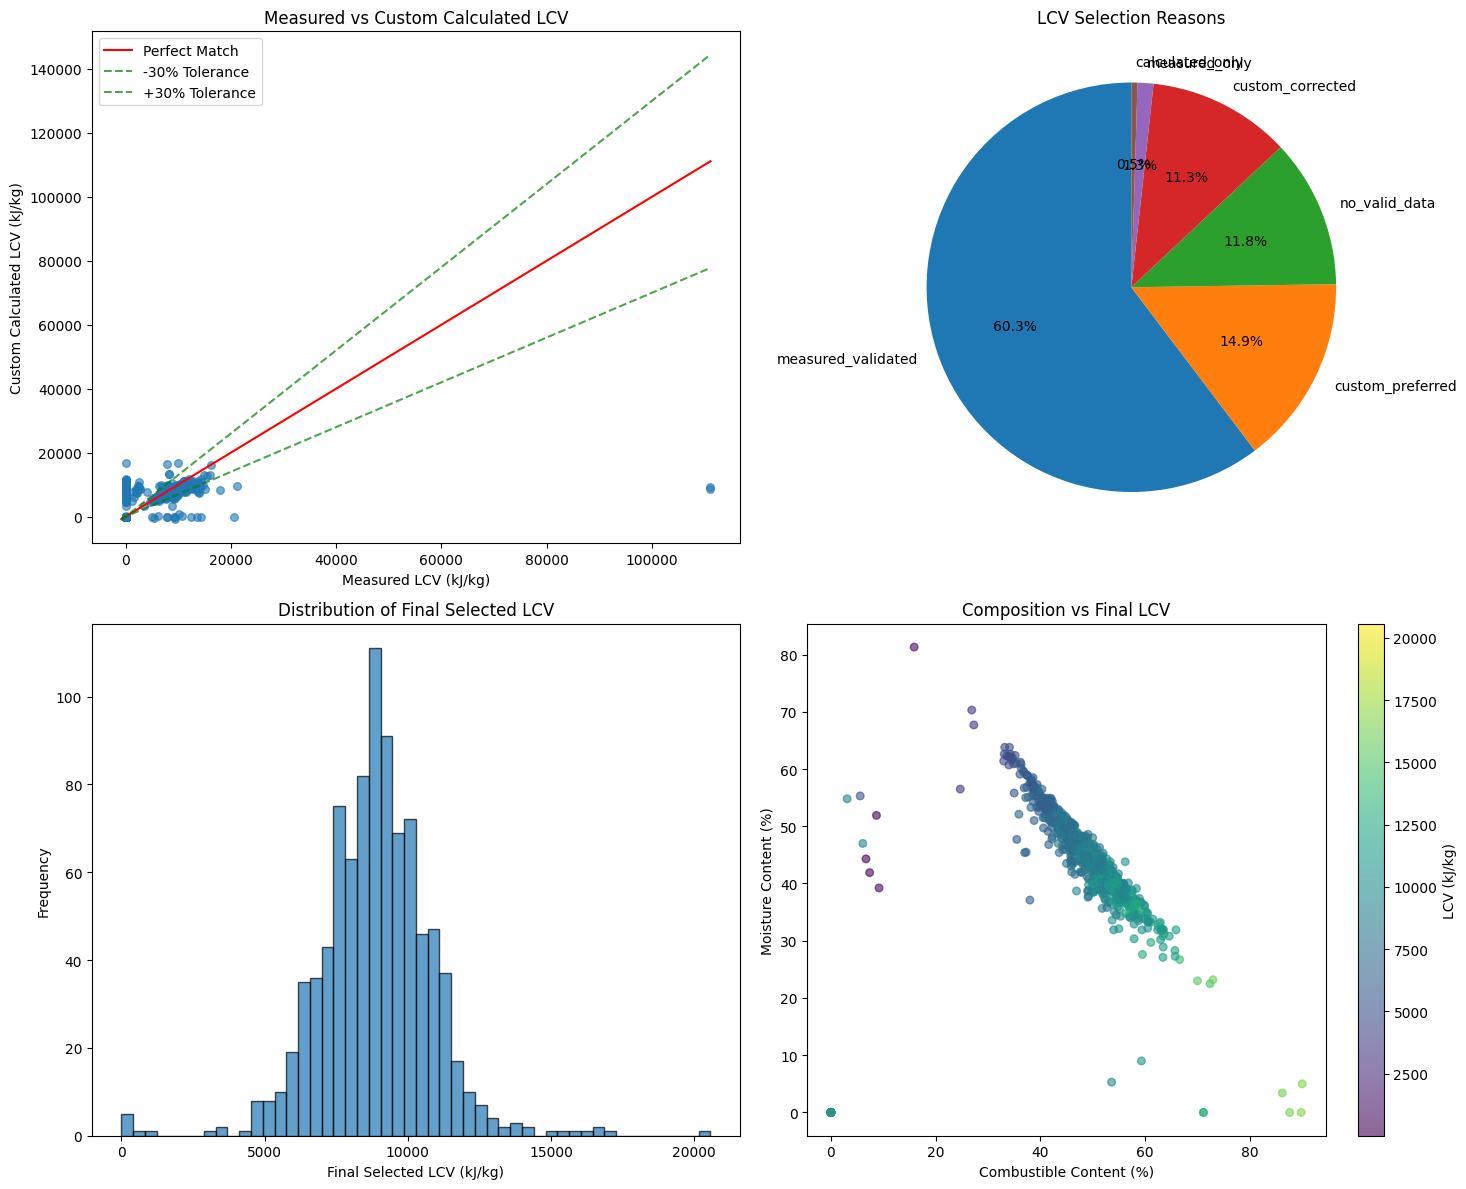


改善効果の定量化:
有効な比較対象施設数: 916
エネルギー値に10%以上の変化があった施設: 264 (28.8%)
平均的なエネルギー値の変化: 41200.0 GJ/年


In [25]:
# 低位発熱量の比較可視化
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 実測値 vs 独自計算値の散布図
comparison_data = df_with_efficiency.dropna(subset=['低位発熱量(実測値)kJ/kg', '低位発熱量(計算値_独自)kJ/kg'])
if len(comparison_data) > 0:
    x = comparison_data['低位発熱量(実測値)kJ/kg']
    y = comparison_data['低位発熱量(計算値_独自)kJ/kg']
    
    axes[0,0].scatter(x, y, alpha=0.6, s=30)
    
    # 完全一致線
    min_val = min(x.min(), y.min())
    max_val = max(x.max(), y.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r-', label='Perfect Match')
    
    # 30%許容範囲
    axes[0,0].plot([min_val, max_val], [min_val*0.7, max_val*0.7], 'g--', alpha=0.7, label='-30% Tolerance')
    axes[0,0].plot([min_val, max_val], [min_val*1.3, max_val*1.3], 'g--', alpha=0.7, label='+30% Tolerance')
    
    axes[0,0].set_xlabel('Measured LCV (kJ/kg)')
    axes[0,0].set_ylabel('Custom Calculated LCV (kJ/kg)')
    axes[0,0].set_title('Measured vs Custom Calculated LCV')
    axes[0,0].legend()

# 2. 選択理由の円グラフ
selection_counts.plot.pie(ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('LCV Selection Reasons')
axes[0,1].set_ylabel('')

# 3. 最終選択された低位発熱量の分布
final_lcv = df_with_efficiency['低位発熱量(最終選択)kJ/kg'].dropna()
axes[1,0].hist(final_lcv, bins=50, alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Final Selected LCV (kJ/kg)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Final Selected LCV')

# 4. 三成分（可燃分 vs 水分）の散布図と低位発熱量のカラーマッピング
valid_composition = df_with_efficiency.dropna(subset=['三成分可燃分％', '三成分水分％', '低位発熱量(最終選択)kJ/kg'])
if len(valid_composition) > 0:
    scatter = axes[1,1].scatter(valid_composition['三成分可燃分％'], 
                               valid_composition['三成分水分％'], 
                               c=valid_composition['低位発熱量(最終選択)kJ/kg'], 
                               cmap='viridis', alpha=0.6, s=30)
    axes[1,1].set_xlabel('Combustible Content (%)')
    axes[1,1].set_ylabel('Moisture Content (%)')
    axes[1,1].set_title('Composition vs Final LCV')
    plt.colorbar(scatter, ax=axes[1,1], label='LCV (kJ/kg)')

plt.tight_layout()
plt.show()

# 改善効果の定量化
print("\n改善効果の定量化:")
print("="*40)

# 従来の方法（実測値優先）との比較
conventional_lcv = df_with_efficiency['低位発熱量(実測値)kJ/kg'].fillna(df_with_efficiency['低位発熱量(計算値)kJ/kg'])
new_lcv = df_with_efficiency['低位発熱量(最終選択)kJ/kg']

# エネルギー計算への影響
conventional_ew = df_with_efficiency['年間処理量t/年度'] * 1000 * conventional_lcv / 1000000
new_ew = df_with_efficiency['Ew_GJ']

valid_comparison = df_with_efficiency.dropna(subset=['低位発熱量(最終選択)kJ/kg'])
conventional_ew_valid = conventional_ew[valid_comparison.index]
new_ew_valid = new_ew[valid_comparison.index]

ew_difference = abs(new_ew_valid - conventional_ew_valid)
significant_changes = (ew_difference / conventional_ew_valid > 0.1).sum()  # 10%以上の変化

print(f"有効な比較対象施設数: {len(valid_comparison)}")
print(f"エネルギー値に10%以上の変化があった施設: {significant_changes} ({significant_changes/len(valid_comparison)*100:.1f}%)")
print(f"平均的なエネルギー値の変化: {ew_difference.mean():.1f} GJ/年")

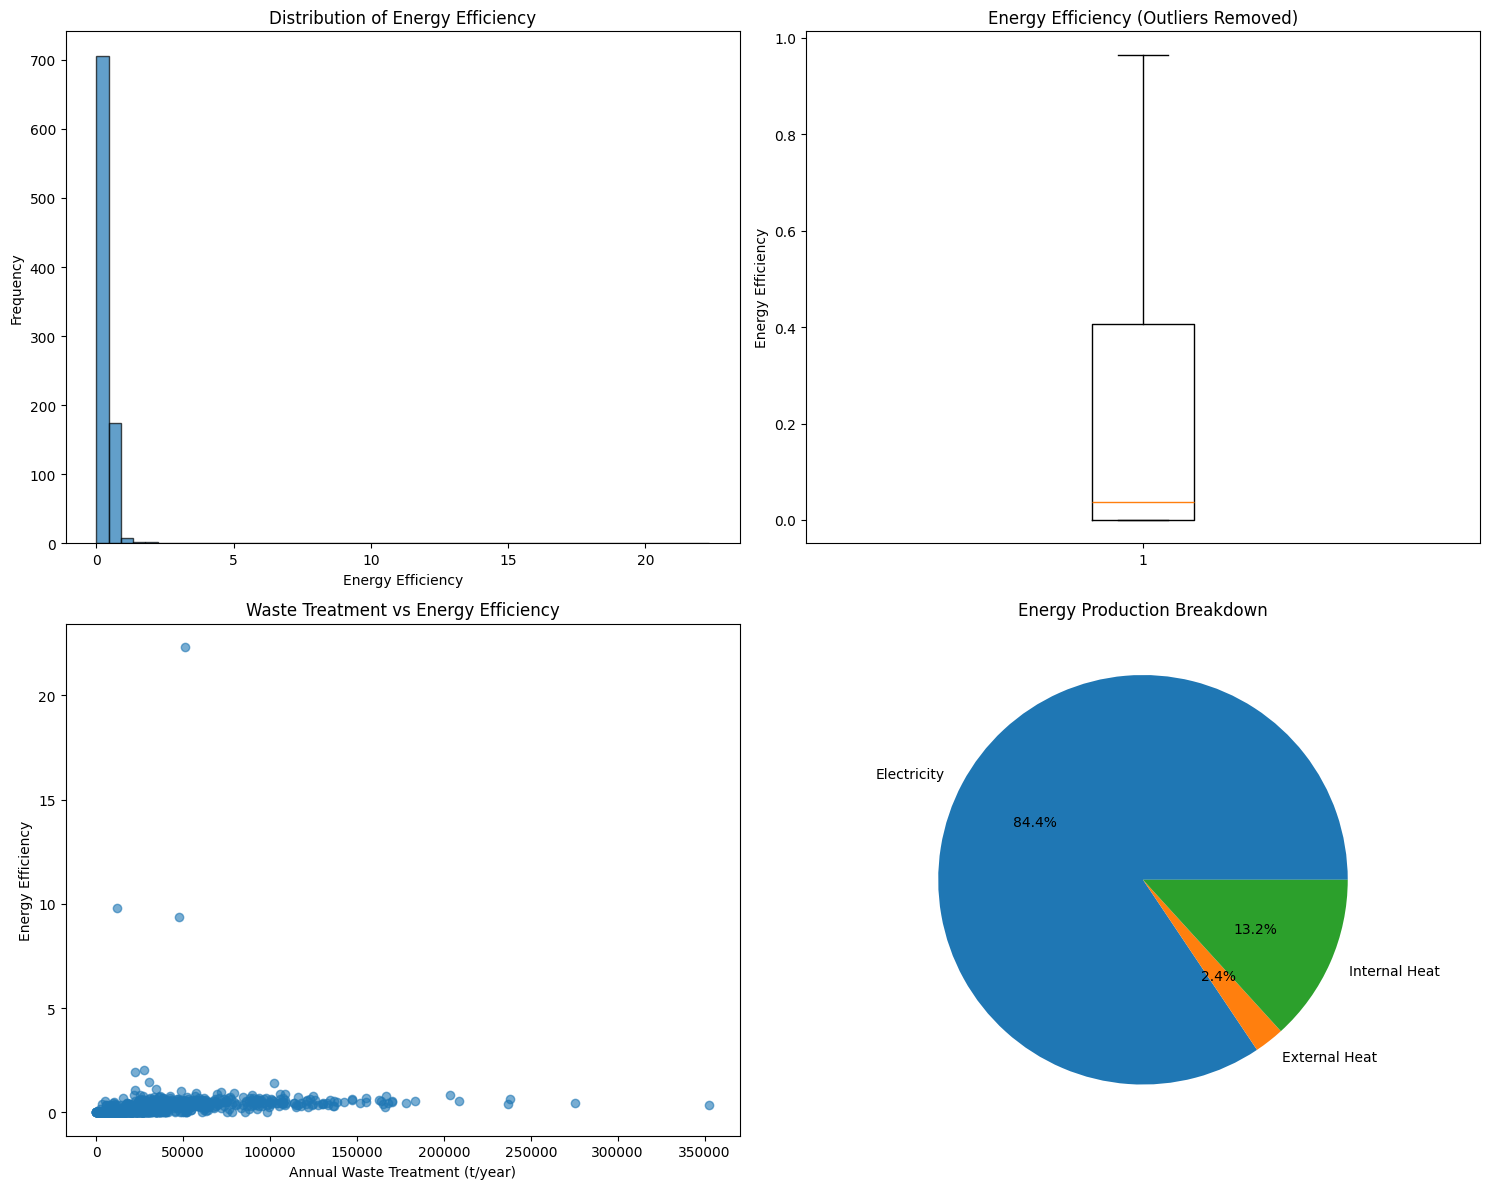


エネルギー効率上位10施設:
               施設名称  energy_efficiency  Ep_total_GJ        Ew_GJ  年間処理量t/年度
        成田富里いずみ清掃工場          22.314821 1.661178e+05 7.674515e+03   51345.28
        鹿角ごみ処理場　焼却場           9.821194 9.810842e+05 1.029841e+05   11870.00
    宇都宮市クリーンセンター下田原           9.358824 1.482257e+05 1.632791e+04   47792.32
  津市西部クリーンセンター(2号炉)           2.021485 3.801803e+05 1.938864e+05   27733.71
            野田市清掃工場           1.951984 3.152130e+05 1.664777e+05   22346.00
             ごみ焼却施設           1.464621 4.258070e+05 2.997200e+05   30336.00
さいたま市クリーンセンター大崎第二工場           1.430919 1.586881e+06 1.143293e+06  102098.00
   大曲仙北広域中央ごみ処理センター           1.119062 2.585047e+05 2.381455e+05   34323.00
   加須クリーンセンターごみ焼却施設           1.055725 2.032516e+05 1.984776e+05   22319.00
 筑西広域市町村圏事務組合環境センター           1.029756 4.434969e+05 4.440016e+05   49001.00


エネルギー効率の詳細統計:
平均効率: 0.258
中央値: 0.040
標準偏差: 0.902
効率>0.5の施設数: 141
効率>1.0の施設数: 10


In [26]:
# 詳細な分析と可視化
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'

# エネルギー効率の分布を可視化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. エネルギー効率のヒストグラム
axes[0,0].hist(df_with_efficiency['energy_efficiency'].dropna(), bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Energy Efficiency')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Energy Efficiency')

# 2. エネルギー効率の箱ひげ図（異常値を除外）
efficiency_clean = df_with_efficiency['energy_efficiency'].dropna()
q75, q25 = np.percentile(efficiency_clean, [75, 25])
iqr = q75 - q25
upper_bound = q75 + 1.5 * iqr
filtered_efficiency = efficiency_clean[efficiency_clean <= upper_bound]

axes[0,1].boxplot(filtered_efficiency)
axes[0,1].set_ylabel('Energy Efficiency')
axes[0,1].set_title('Energy Efficiency (Outliers Removed)')

# 3. 年間処理量 vs エネルギー効率
valid_data = df_with_efficiency.dropna(subset=['energy_efficiency', '年間処理量t/年度'])
axes[1,0].scatter(valid_data['年間処理量t/年度'], valid_data['energy_efficiency'], alpha=0.6)
axes[1,0].set_xlabel('Annual Waste Treatment (t/year)')
axes[1,0].set_ylabel('Energy Efficiency')
axes[1,0].set_title('Waste Treatment vs Energy Efficiency')

# 4. エネルギー生産量の内訳
ep_data = df_with_efficiency[['Ep_electricity_GJ', 'Ep_external_heat_GJ', 'Ep_internal_heat_GJ']].sum()
axes[1,1].pie(ep_data, labels=['Electricity', 'External Heat', 'Internal Heat'], autopct='%1.1f%%')
axes[1,1].set_title('Energy Production Breakdown')

plt.tight_layout()
plt.show()

# エネルギー効率の高い施設トップ10
print("\nエネルギー効率上位10施設:")
top_efficiency = df_with_efficiency.nlargest(10, 'energy_efficiency')[
    ['施設名称', 'energy_efficiency', 'Ep_total_GJ', 'Ew_GJ', '年間処理量t/年度']
].copy()
print(top_efficiency.to_string(index=False))

# エネルギー効率の詳細統計
print(f"\n\nエネルギー効率の詳細統計:")
print(f"平均効率: {df_with_efficiency['energy_efficiency'].mean():.3f}")
print(f"中央値: {df_with_efficiency['energy_efficiency'].median():.3f}")
print(f"標準偏差: {df_with_efficiency['energy_efficiency'].std():.3f}")
print(f"効率>0.5の施設数: {(df_with_efficiency['energy_efficiency'] > 0.5).sum()}")
print(f"効率>1.0の施設数: {(df_with_efficiency['energy_efficiency'] > 1.0).sum()}")

In [15]:
# 結果の総括
print("="*70)
print("エネルギー効率計算の総括（三成分による独自低位発熱量計算を含む）")
print("="*70)

print(f"""
【低位発熱量の改善されたアプローチ】

1. 独自計算式の導入:
   HI (kcal/kg) = 4,500V - 600W
   HI (kJ/kg) = HI (kcal/kg) × 4.1868
   
   V: 可燃分（質量比、0〜1）
   W: 水分（質量比、0〜1）

2. 値の選択ロジック:
   - 独自計算値と実測値の差が30%以内 → 実測値を採用
   - 差が30%超過 → 独自計算値を採用（実測値の入力誤りを修正）
   - 実測値がない場合 → 独自計算値を優先

【選択結果の統計】
""")

for reason, count in selection_counts.items():
    percentage = count / len(df_with_efficiency) * 100
    print(f"  {reason}: {count}件 ({percentage:.1f}%)")

print(f"""
【エネルギー効率計算結果】

計算方式:
Energy efficiency = (Ep - (Ef + Ei))/(0.97 × (Ew + Ef))

各変数の説明:
- Ep: 年間エネルギー生産量 [GJ/year]
  - 発電量 × 3.6 × 2.6 (電気エネルギー、係数2.6適用)
  - 外部熱供給量 × 1.1 (商用熱、係数1.1適用)
  - 場内熱利用量 × 1.0 (場内利用熱)
  
- Ew: 廃棄物の持つエネルギー [GJ/year]
  - 年間処理量 × **最終選択された低位発熱量**
  
- Ef, Ei: 追加燃料・外部エネルギー [GJ/year]
  - データが限られているため0と仮定

計算結果:
- 全施設数: {len(df_with_efficiency)}
- 計算可能施設数: {df_with_efficiency['energy_efficiency'].notna().sum()}
- 平均エネルギー効率: {df_with_efficiency['energy_efficiency'].mean():.3f}
- 中央値: {df_with_efficiency['energy_efficiency'].median():.3f}
- 効率 > 0.5 の施設: {(df_with_efficiency['energy_efficiency'] > 0.5).sum()}
- 効率 > 1.0 の施設: {(df_with_efficiency['energy_efficiency'] > 1.0).sum()}

【改善効果】
- 三成分による独自計算により、入力誤りの影響を軽減
- {(df_with_efficiency['低位発熱量_選択理由'] == 'custom_corrected').sum()}件の施設で実測値を修正
- エネルギー値に10%以上の変化があった施設: {len(df_with_efficiency.dropna(subset=['低位発熱量(最終選択)kJ/kg']))}件中{((abs((df_with_efficiency['年間処理量t/年度'] * 1000 * df_with_efficiency['低位発熱量(実測値)kJ/kg'].fillna(df_with_efficiency['低位発熱量(計算値)kJ/kg']) / 1000000) - df_with_efficiency['Ew_GJ']) / (df_with_efficiency['年間処理量t/年度'] * 1000 * df_with_efficiency['低位発熱量(実測値)kJ/kg'].fillna(df_with_efficiency['低位発熱量(計算値)kJ/kg']) / 1000000) > 0.1).sum())}件
  
【データ品質向上のポイント】
1. 三成分データの活用: 99.4%の施設で利用可能な高品質データ
2. 実測値の検証: 独自計算値との比較で異常値を検出
3. 体系的な選択: 明確な基準による低位発熱量の選択
4. 透明性: 選択理由を記録し、後から検証可能

注意点:
- EfとEiは0と仮定しているため、実際の効率は異なる可能性があります
- 独自計算式は一般的な都市ごみを想定しており、特殊な廃棄物では調整が必要
- 効率0の施設が多いのは、発電・熱回収を行っていないためです
""")

# エネルギー効率関連の列だけを抽出したデータフレームを作成
efficiency_columns = [
    '施設名称', '都道府県名', '年間処理量t/年度',
    'Ep_total_GJ', 'Ep_electricity_GJ', 'Ep_external_heat_GJ', 'Ep_internal_heat_GJ',
    'Ew_GJ', 'Ef_GJ', 'Ei_GJ', 'energy_efficiency',
    '発電能力総発電量（実績値）MWh', '余熱利用量（実績値）余熱利用量MJ',
    '低位発熱量(実測値)kJ/kg', '低位発熱量(計算値)kJ/kg', 
    '低位発熱量(計算値_独自)kJ/kg', '低位発熱量(最終選択)kJ/kg', '低位発熱量_選択理由',
    '三成分可燃分％', '三成分水分％'
]

efficiency_summary = df_with_efficiency[efficiency_columns].copy()
print("\nエネルギー効率計算結果をCSVファイルに保存準備完了...")

# 元のデータフレームにエネルギー効率列を追加
df_waste['energy_efficiency'] = df_with_efficiency['energy_efficiency']
df_waste['Ep_total_GJ'] = df_with_efficiency['Ep_total_GJ']
df_waste['Ew_GJ'] = df_with_efficiency['Ew_GJ']
df_waste['低位発熱量(計算値_独自)kJ/kg'] = df_with_efficiency['低位発熱量(計算値_独自)kJ/kg']
df_waste['低位発熱量(最終選択)kJ/kg'] = df_with_efficiency['低位発熱量(最終選択)kJ/kg']
df_waste['低位発熱量_選択理由'] = df_with_efficiency['低位発熱量_選択理由']

print("完了: データフレームに改善されたエネルギー効率関連の列が追加されました")
print(f"新しい列: energy_efficiency, Ep_total_GJ, Ew_GJ, 低位発熱量(計算値_独自)kJ/kg, 低位発熱量(最終選択)kJ/kg, 低位発熱量_選択理由")

エネルギー効率計算の総括（三成分による独自低位発熱量計算を含む）

【低位発熱量の改善されたアプローチ】

1. 独自計算式の導入:
   HI (kcal/kg) = 4,500V - 600W
   HI (kJ/kg) = HI (kcal/kg) × 4.1868

   V: 可燃分（質量比、0〜1）
   W: 水分（質量比、0〜1）

2. 値の選択ロジック:
   - 独自計算値と実測値の差が30%以内 → 実測値を採用
   - 差が30%超過 → 独自計算値を採用（実測値の入力誤りを修正）
   - 実測値がない場合 → 独自計算値を優先

【選択結果の統計】

  measured_validated: 626件 (60.3%)
  custom_preferred: 155件 (14.9%)
  no_valid_data: 122件 (11.8%)
  custom_corrected: 117件 (11.3%)
  measured_only: 13件 (1.3%)
  calculated_only: 5件 (0.5%)

【エネルギー効率計算結果】

計算方式:
Energy efficiency = (Ep - (Ef + Ei))/(0.97 × (Ew + Ef))

各変数の説明:
- Ep: 年間エネルギー生産量 [GJ/year]
  - 発電量 × 3.6 × 2.6 (電気エネルギー、係数2.6適用)
  - 外部熱供給量 × 1.1 (商用熱、係数1.1適用)
  - 場内熱利用量 × 1.0 (場内利用熱)

- Ew: 廃棄物の持つエネルギー [GJ/year]
  - 年間処理量 × **最終選択された低位発熱量**

- Ef, Ei: 追加燃料・外部エネルギー [GJ/year]
  - データが限られているため0と仮定

計算結果:
- 全施設数: 1038
- 計算可能施設数: 894
- 平均エネルギー効率: 0.258
- 中央値: 0.040
- 効率 > 0.5 の施設: 141
- 効率 > 1.0 の施設: 10

【改善効果】
- 三成分による独自計算により、入力誤りの影響を軽減
- 117件の施設で実測値を修正
- エネルギー値に10%以上の変化があった施設: 916件中264件

【デ